In [66]:
# Used for visualization of plots
import matplotlib.pyplot as plt

# Used for dealing with Data Structures
import numpy as np

# Used to visualize tables 
import pandas as pd

# Algorithm for K Means Clustering
from sklearn.cluster import KMeans

# Algorithm for PCA
from sklearn.decomposition import PCA

from lightgbm import LGBMClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split


In [67]:
df =pd.read_csv("../input/tabular-playground-series-may-2021/train.csv")

In [68]:
x = df.drop(["id","target"],axis=1)

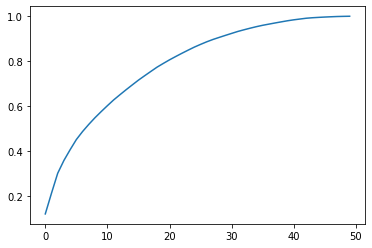

In [69]:
pca = PCA(50)
pca.fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
test = pca.fit_transform(x)

In [70]:
test_df = pd.DataFrame(test)

In [71]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-2.988589,-1.660150,-2.586300,-0.740777,-0.943754,-1.137107,-0.741629,0.617755,-0.835474,0.281441,...,-0.385897,-0.337237,-0.138192,-0.124459,-0.158741,-0.172078,-0.130133,0.833805,-0.135827,-0.100393
1,-2.968098,-1.759909,-2.580096,-0.771288,-1.065164,-1.205751,-0.854350,1.136181,-1.589232,-1.336625,...,-0.321383,-0.275389,-0.076922,-0.142282,-0.042572,0.866130,-0.204201,-0.096301,-0.105376,-0.062686
2,0.067513,-0.508523,-1.548956,-0.532465,-0.996399,-1.138206,-0.683864,-0.138133,-0.722320,1.786348,...,-0.506730,-0.694586,-0.113810,-0.229603,-0.165636,-0.084223,1.791030,-0.271189,0.829166,-0.140498
3,0.848145,-0.213767,4.464292,-0.679204,-1.140663,-1.254214,-0.807408,-0.453693,1.736890,-0.433213,...,-0.482016,-0.373982,-0.076932,-0.210637,-0.126817,-0.128877,-0.153159,-0.055450,-0.052119,0.949969
4,-2.045446,-1.611739,-0.524516,-0.773730,-0.999128,-0.281715,-1.025142,-0.809527,-1.260957,-0.355345,...,-0.386620,-0.347422,-0.065227,-0.159113,-0.124620,-0.163186,-0.167497,-0.107916,-0.104181,-0.054584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-2.931807,-1.698169,-2.523381,-0.639401,-0.464260,3.748952,-0.989480,-0.538828,0.858831,-1.022815,...,0.637721,-0.334240,-0.094132,-0.135271,-0.151891,-0.162486,-0.171552,-0.108180,-0.109964,-0.056876
99996,3.957527,-1.494400,1.627969,-0.648554,1.111168,0.439692,-0.889731,-0.603516,-0.071082,-1.308110,...,-0.301062,-0.267887,-0.081509,-0.148374,-0.145789,-0.148240,-0.183101,-0.093911,-0.104399,-0.058946
99997,2.038130,-0.765577,-2.510840,-0.791159,-1.135967,-1.304041,-1.011469,-0.771271,-1.221983,0.676258,...,-0.449571,-0.294700,-0.001174,-0.173168,-0.076835,0.835897,-0.237421,-0.100601,-0.108943,-0.073094
99998,-2.008076,-1.596402,-0.562793,-0.752789,-1.064491,-1.247403,-0.908248,0.367025,-1.192627,3.081176,...,-0.441120,-0.328897,-0.079784,-0.177171,-0.138100,-0.159312,-0.160972,-0.076776,-0.102352,-0.050476


In [72]:
params = {'lambda_l1': 0.0005545043869670939, 'lambda_l2': 0.007756087459492575, 'num_leaves': 214, 'feature_fraction': 0.45813934191357764, 'bagging_fraction': 0.7282099876945644, 'bagging_freq': 5, 'min_child_samples': 31, 'max_depth': 5}


In [73]:
lgbm = LGBMClassifier(**params)

# lgb = lgbm.fit(test,df["target"])

In [74]:
cv = cross_val_score(lgbm,test,df["target"],cv=5,scoring="neg_log_loss")

[LightGBM] [Warning] lambda_l1 is set=0.0005545043869670939, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005545043869670939
[LightGBM] [Warning] bagging_fraction is set=0.7282099876945644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7282099876945644
[LightGBM] [Warning] lambda_l2 is set=0.007756087459492575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007756087459492575
[LightGBM] [Warning] feature_fraction is set=0.45813934191357764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45813934191357764
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l1 is set=0.0005545043869670939, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005545043869670939
[LightGBM] [Warning] bagging_fraction is set=0.7282099876945644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7282099876945644
[LightGBM] [Warning] lambd

In [75]:
cv.mean()

-1.0992134403730973

In [76]:
cv

array([-1.10199539, -1.1009167 , -1.09614865, -1.09881775, -1.09818871])